<a href="https://colab.research.google.com/github/RishabhVenkat/Sentiment-Analysis-Project-with-NLTK-and-Transformers/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [2]:
def handle_bad_lines(row):
    # Custom logic to handle the bad line
    return None  # Skip the line

df = pd.read_csv('/content/Reviews[2].csv', engine='python', on_bad_lines=handle_bad_lines)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [5]:
print(df.shape)

(10364, 10)


## Quick EDA

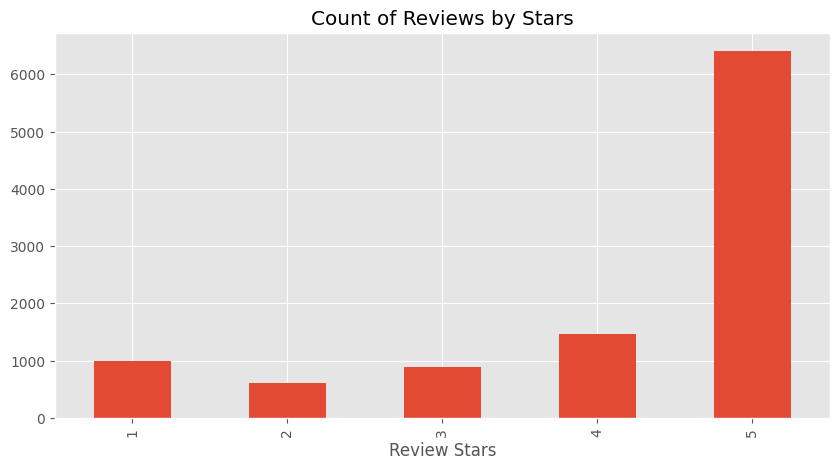

In [6]:
ax = df['Score'].value_counts().sort_index() \
  .plot(kind = 'bar',
        title = 'Count of Reviews by Stars',
        figsize = (10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [7]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [8]:
nltk.word_tokenize(example)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [9]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [10]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [11]:
entities =  nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [13]:
sia

In [14]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [15]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [16]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [17]:
from tqdm import tqdm
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    if text is not None:
        res[myid] = sia.polarity_scores(text)
    else:
        res[myid] = None


100%|██████████| 10364/10364 [00:28<00:00, 367.47it/s]


In [18]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [19]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [20]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10359,10360,0.026,0.888,0.087,0.7712,B0001VWGWS,A1IWZAYY9GTLGL,"concurrent1 ""concurrent1""",0,0,5,1334966400,Best chili powder I ever tried!,I had a recipe that called for a lot of dark c...
10360,10361,0.000,0.884,0.116,0.2732,B000V6FTTU,A5PFMT0YEZV32,Olga Troubina,8,9,3,1199232000,Good chili,This chili is filling and mildly spicy. Cooks ...
10361,10362,0.060,0.888,0.052,0.1655,B000V6FTTU,A2AFTCLYIEQMLV,"highlander ""duncan""",7,8,3,1210550400,Good for workers w/ ten minute lunch breaks,Keep box of saltines nearby and nuke this stuf...
10362,10363,0.095,0.861,0.043,-0.2519,B000V6FTTU,A3N4SGWWMUTY1Z,Gregory Law,5,6,3,1217116800,Edible but not great,One of the disappointments with Campbell's Chu...


In [21]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Plot VADER Results

<function matplotlib.pyplot.show(close=None, block=None)>

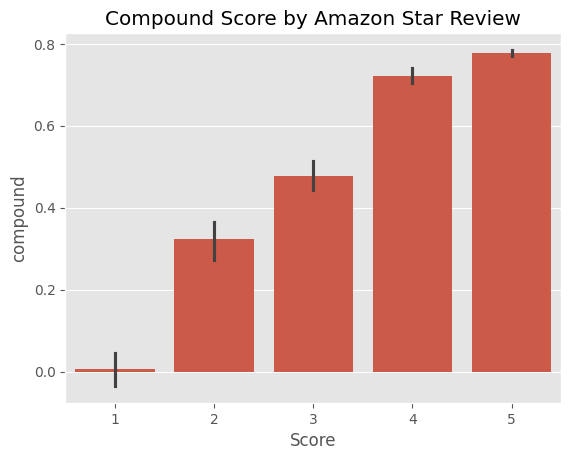

In [22]:
import seaborn as sns

ax = sns.barplot(data = vaders, x = 'Score', y = 'compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show

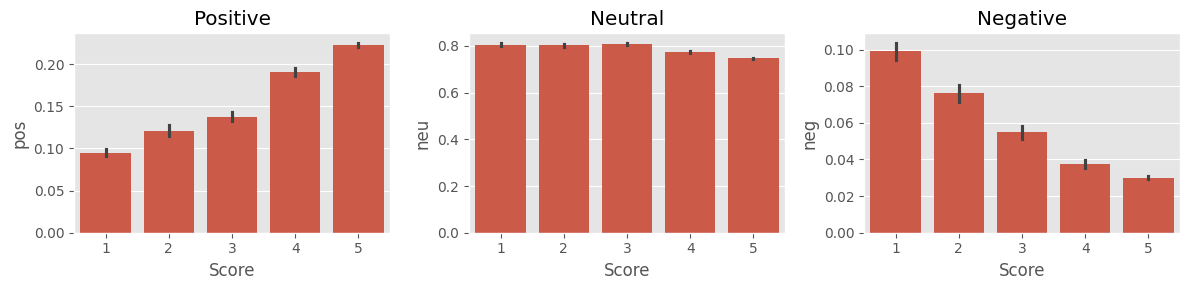

In [23]:
fig, axs = plt.subplots(1, 3, figsize = (12, 3))
sns.barplot(data = vaders, x = 'Score', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'Score', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'Score', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model

In [24]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [25]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [26]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [27]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687465, 'roberta_pos': 0.0029573692}


In [28]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors = 'pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
  }
  return scores_dict

In [29]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
      text = row['Text']
      myid = row['Id']
      vader_result = sia.polarity_scores(text)
      vader_result_rename = {}
      for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
      roberta_result = polarity_scores_roberta(text)
      both = {**vader_result_rename, **roberta_result}
      res[myid] = both
  except RuntimeError:
      print(f"Broke for id {myid}")


  1%|          | 83/10364 [00:28<33:45,  5.08it/s]

Broke for id 83


  2%|▏         | 188/10364 [01:02<31:50,  5.33it/s]

Broke for id 187


  5%|▌         | 528/10364 [03:06<1:12:18,  2.27it/s]

Broke for id 529


  5%|▌         | 539/10364 [03:09<39:23,  4.16it/s]

Broke for id 540


  7%|▋         | 745/10364 [04:30<1:28:41,  1.81it/s]

Broke for id 746


  8%|▊         | 864/10364 [05:12<37:16,  4.25it/s]

Broke for id 863


 10%|█         | 1052/10364 [06:39<43:33,  3.56it/s]

Broke for id 1053


 10%|█         | 1069/10364 [06:45<1:01:58,  2.50it/s]

Broke for id 1070


 11%|█         | 1157/10364 [07:17<31:03,  4.94it/s]

Broke for id 1156


 13%|█▎        | 1320/10364 [08:14<54:02,  2.79it/s]

Broke for id 1321


 13%|█▎        | 1374/10364 [08:32<1:40:29,  1.49it/s]

Broke for id 1375


 14%|█▍        | 1497/10364 [09:17<35:17,  4.19it/s]

Broke for id 1498


 15%|█▌        | 1574/10364 [09:47<1:45:18,  1.39it/s]

Broke for id 1575


 17%|█▋        | 1797/10364 [11:05<21:10,  6.74it/s]

Broke for id 1796


 18%|█▊        | 1825/10364 [11:15<1:09:08,  2.06it/s]

Broke for id 1826


 21%|██        | 2168/10364 [13:33<41:13,  3.31it/s]

Broke for id 2169


 22%|██▏       | 2247/10364 [14:01<34:46,  3.89it/s]

Broke for id 2248


 24%|██▍       | 2475/10364 [15:27<52:02,  2.53it/s]

Broke for id 2476


 24%|██▍       | 2491/10364 [15:36<49:29,  2.65it/s]

Broke for id 2492


 25%|██▍       | 2583/10364 [16:15<1:07:31,  1.92it/s]

Broke for id 2584


 25%|██▌       | 2609/10364 [16:28<1:05:19,  1.98it/s]

Broke for id 2610


 28%|██▊       | 2896/10364 [18:22<1:08:39,  1.81it/s]

Broke for id 2897
Broke for id 2898


 28%|██▊       | 2901/10364 [18:23<38:19,  3.25it/s]

Broke for id 2902


 28%|██▊       | 2929/10364 [18:32<39:09,  3.16it/s]  

Broke for id 2928


 28%|██▊       | 2943/10364 [18:39<51:19,  2.41it/s]  

Broke for id 2942
Broke for id 2944


 28%|██▊       | 2946/10364 [18:40<43:01,  2.87it/s]

Broke for id 2947
Broke for id 2948


 29%|██▉       | 3021/10364 [19:08<45:54,  2.67it/s]

Broke for id 3022
Broke for id 3023


 29%|██▉       | 3024/10364 [19:09<28:43,  4.26it/s]

Broke for id 3025


 32%|███▏      | 3305/10364 [20:48<40:50,  2.88it/s]

Broke for id 3306


 37%|███▋      | 3789/10364 [23:43<21:30,  5.09it/s]

Broke for id 3788


 38%|███▊      | 3968/10364 [24:42<26:40,  4.00it/s]

Broke for id 3969


 40%|███▉      | 4108/10364 [25:41<28:36,  3.65it/s]

Broke for id 4107


 40%|███▉      | 4109/10364 [25:41<31:38,  3.29it/s]

Broke for id 4110


 42%|████▏     | 4306/10364 [27:00<39:30,  2.56it/s]

Broke for id 4307


 42%|████▏     | 4315/10364 [27:05<56:34,  1.78it/s]  

Broke for id 4316


 43%|████▎     | 4409/10364 [27:36<22:20,  4.44it/s]

Broke for id 4408


 43%|████▎     | 4484/10364 [28:01<16:45,  5.85it/s]

Broke for id 4483


 44%|████▎     | 4511/10364 [28:15<35:37,  2.74it/s]

Broke for id 4512


 44%|████▍     | 4552/10364 [28:35<38:38,  2.51it/s]

Broke for id 4553


 44%|████▍     | 4582/10364 [28:56<1:03:24,  1.52it/s]

Broke for id 4583


 49%|████▊     | 5039/10364 [32:00<31:39,  2.80it/s]

Broke for id 5040


 50%|████▉     | 5181/10364 [32:54<34:42,  2.49it/s]

Broke for id 5182


 50%|█████     | 5193/10364 [33:00<30:18,  2.84it/s]

Broke for id 5192


 52%|█████▏    | 5364/10364 [34:02<29:13,  2.85it/s]

Broke for id 5365


 52%|█████▏    | 5441/10364 [34:38<30:33,  2.69it/s]

Broke for id 5442


 55%|█████▌    | 5708/10364 [36:22<34:45,  2.23it/s]

Broke for id 5709


 58%|█████▊    | 5997/10364 [38:17<19:46,  3.68it/s]

Broke for id 5998


 58%|█████▊    | 6002/10364 [38:19<37:13,  1.95it/s]

Broke for id 6003


 58%|█████▊    | 6006/10364 [38:21<41:23,  1.75it/s]

Broke for id 6007


 59%|█████▉    | 6105/10364 [38:59<38:31,  1.84it/s]

Broke for id 6106


 60%|██████    | 6233/10364 [39:49<59:22,  1.16it/s]  

Broke for id 6234


 63%|██████▎   | 6557/10364 [42:06<29:41,  2.14it/s]

Broke for id 6558


 64%|██████▍   | 6650/10364 [42:48<54:58,  1.13it/s]  

Broke for id 6651


 66%|██████▌   | 6797/10364 [44:13<59:16,  1.00it/s]

Broke for id 6798


 66%|██████▌   | 6837/10364 [44:36<34:14,  1.72it/s]

Broke for id 6838


 66%|██████▌   | 6849/10364 [44:45<1:05:05,  1.11s/it]

Broke for id 6850


 66%|██████▋   | 6885/10364 [45:04<20:21,  2.85it/s]

Broke for id 6886


 67%|██████▋   | 6904/10364 [45:12<43:31,  1.33it/s]

Broke for id 6905


 67%|██████▋   | 6954/10364 [45:40<21:39,  2.62it/s]

Broke for id 6955


 68%|██████▊   | 7076/10364 [46:28<23:15,  2.36it/s]

Broke for id 7077


 68%|██████▊   | 7087/10364 [46:32<16:31,  3.30it/s]

Broke for id 7088


 69%|██████▉   | 7200/10364 [47:16<16:38,  3.17it/s]

Broke for id 7201


 73%|███████▎  | 7605/10364 [49:50<12:46,  3.60it/s]

Broke for id 7604


 73%|███████▎  | 7607/10364 [49:51<14:46,  3.11it/s]

Broke for id 7608


 74%|███████▍  | 7670/10364 [50:15<24:17,  1.85it/s]

Broke for id 7671


 74%|███████▍  | 7700/10364 [50:34<26:22,  1.68it/s]

Broke for id 7701


 75%|███████▌  | 7809/10364 [51:14<13:56,  3.05it/s]

Broke for id 7810


 76%|███████▋  | 7908/10364 [51:50<24:44,  1.65it/s]

Broke for id 7907


 78%|███████▊  | 8076/10364 [53:04<09:01,  4.23it/s]

Broke for id 8077


 78%|███████▊  | 8130/10364 [53:22<12:03,  3.09it/s]

Broke for id 8131


 80%|███████▉  | 8265/10364 [54:21<25:36,  1.37it/s]

Broke for id 8266


 84%|████████▍ | 8739/10364 [57:18<11:51,  2.29it/s]

Broke for id 8740


 84%|████████▍ | 8756/10364 [57:28<07:14,  3.70it/s]

Broke for id 8757


 86%|████████▌ | 8934/10364 [58:41<05:35,  4.27it/s]

Broke for id 8935


 93%|█████████▎| 9589/10364 [1:02:51<07:15,  1.78it/s]

Broke for id 9590


 95%|█████████▌| 9849/10364 [1:04:53<07:56,  1.08it/s]

Broke for id 9850


 95%|█████████▌| 9880/10364 [1:05:01<02:35,  3.11it/s]

Broke for id 9881


 96%|█████████▌| 9909/10364 [1:05:16<05:23,  1.41it/s]

Broke for id 9910


 96%|█████████▌| 9922/10364 [1:05:23<05:00,  1.47it/s]

Broke for id 9923


 96%|█████████▋| 10001/10364 [1:05:59<04:47,  1.26it/s]

Broke for id 10002


 97%|█████████▋| 10004/10364 [1:06:00<03:55,  1.53it/s]

Broke for id 10005


 97%|█████████▋| 10030/10364 [1:06:09<01:26,  3.85it/s]

Broke for id 10031


100%|██████████| 10364/10364 [1:08:21<00:00,  2.53it/s]
